In [1]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

'''
Classifying Handwritten Digits with TF.Learn - Machine Learning Recipes #7
December 19, 2016
Coded by Meen Chul Kim

Note:
1. Install
2. Download dataset
3. Visualize images
4. Train a classifier
5. Evaluate
6. Visualize weights

Resources:
Jupyter Notebook: https://goo.gl/NNlMNu
Docker images: https://goo.gl/8fmqVW
MNIST tutorial: https://goo.gl/GQ3t7n
Visualizing MNIST: http://goo.gl/ROcwpR (this blog is outstanding)
More notebooks: https://goo.gl/GgLIh7
More about linear classifiers: https://goo.gl/u2f2NE
Much more about linear classifiers: http://goo.gl/au1PdG (this course is outstanding, highly recommended)
More TF.Learn examples: https://goo.gl/szki63
'''

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


# Initial setup
learn = tf.contrib.learn
tf.logging.set_verbosity(tf.logging.ERROR)

# Import the dataset
mnist = learn.datasets.load_dataset('mnist')
data = mnist.train.images
labels = np.asarray(mnist.train.labels, dtype=np.int32)
test_data = mnist.test.images
test_labels = np.asarray(mnist.test.labels, dtype=np.int32)

# Limit the size to experiment faster, instead of using 55k data points
max_examples = 10000
data = data[:max_examples]
labels = labels[:max_examples]

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


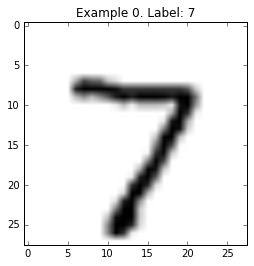

In [7]:
# Display data digits by projecting them to a 28 by 28 two dimensional array
def display(i):
    img = test_data[i]
    plt.title('Example %d. Label: %d' % (i, test_labels[i]))
    plt.imshow(img.reshape((28, 28)), cmap=plt.cm.gray_r)
    
display(0)

In [3]:
# Check up the number of features
print len(data[0])

784


In [8]:
# Build and train a linear classifier
feature_columns = learn.infer_real_valued_columns_from_input(data)
classifier = learn.LinearClassifier(feature_columns=feature_columns, n_classes=10)
classifier.fit(data, labels, batch_size=100, steps=1000)

LinearClassifier()

In [9]:
# Evaluate accuracy
classifier.evaluate(test_data, test_labels)
print classifier.evaluate(test_data, test_labels)["accuracy"]

0.914


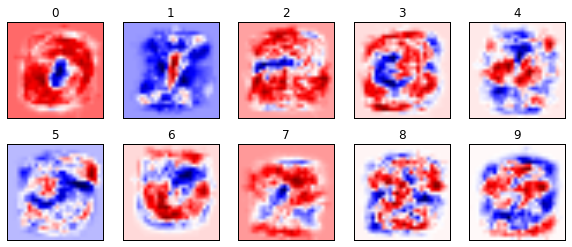

In [10]:
# Visualize learned weights
weights = classifier.weights_
f, axes = plt.subplots(2, 5, figsize=(10,4))
axes = axes.reshape(-1)
for i in range(len(axes)):
    a = axes[i]
    a.imshow(weights.T[i].reshape(28, 28), cmap=plt.cm.seismic)
    a.set_title(i)
    a.set_xticks(()) # ticks be gone
    a.set_yticks(())
plt.show()